In [1]:
from __future__ import print_function
__author__= 'yc3420'

import pylab as pl
import seaborn
import numpy as np
from scipy.optimize import curve_fit, minimize
from scipy.stats import norm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
#dis_chisq = ['chisq']
#dis_gaus = ['gaus']
#dis_pois = ['pois']
#dis_bi = ['binomial']
#dis_lnorm = ['lnorm']

In [3]:
# all dataset sizes are 100
# numpy.random.poisson(lam=1.0, size=None)
#lam: >=0, 

#gaus
#numpy.random.normal(loc=0.0, scale=1.0, size=None)

#numpy.random.chisquare(df, size=None)
#degrees of freedom, should be >0

#cauchy
#numpy.random.standard_cauchy(size=None)

#lnorm
#numpy.random.lognormal(mean=0.0, sigma=1.0, size=None) 

# binomial sampling => numpy.random.binomial(n, p, size=None)
# n: parameter of the distribution; >=0;  p: parameter of the distribution, 0-1; size: optional



In [4]:
#GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 
    #different distributions (500 samples in total), all with the same population mean
#Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 
    #1 more of your choice.
#For each sample PLOT the sample mean (dependent var.) against the sample 
    #size N (independent var.) (if you want you can do it with the sample standard deviation as well).
#DESCRIBE (in a caption to your figure) the behavior you see in the plots in terms of 
    #the law of large numbers or Central Limit Theorem.
#PLOT the distributions of all sample means (together for all distributions).
    #Mandatory: as a histogram. Optional: in any other way you think is convincing

In [5]:
pop_mean = 100
mysize = []
lower = 10
upper = 2000
count = 100
np.random.seed(222)
#generate 100 DIFFERENT random numbers
def generateRandom(counter):
    tempInt=random.randint(lower,upper)
    if (counter <= count):
        if (tempInt not in mysize):
            mysize.append(tempInt)
            counter+=1
        generateRandom(counter)
generateRandom(1)
print (mysize)

[1168, 1079, 637, 1560, 1612, 904, 246, 1376, 119, 1673, 775, 1397, 1286, 1810, 514, 465, 420, 1378, 130, 666, 286, 1623, 505, 93, 1069, 998, 1468, 1461, 1307, 1859, 1683, 402, 1049, 1607, 1786, 152, 1511, 487, 1389, 1345, 721, 673, 662, 919, 499, 606, 375, 591, 771, 1125, 910, 1167, 565, 959, 1817, 1630, 898, 654, 1826, 1594, 231, 1767, 1550, 682, 1882, 315, 213, 1949, 17, 1695, 1979, 372, 364, 983, 360, 928, 1358, 866, 1774, 1580, 1766, 671, 449, 1982, 1853, 1584, 1260, 1222, 961, 913, 61, 793, 124, 1738, 920, 1080, 504, 589, 16, 25]


In [6]:
dic={}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


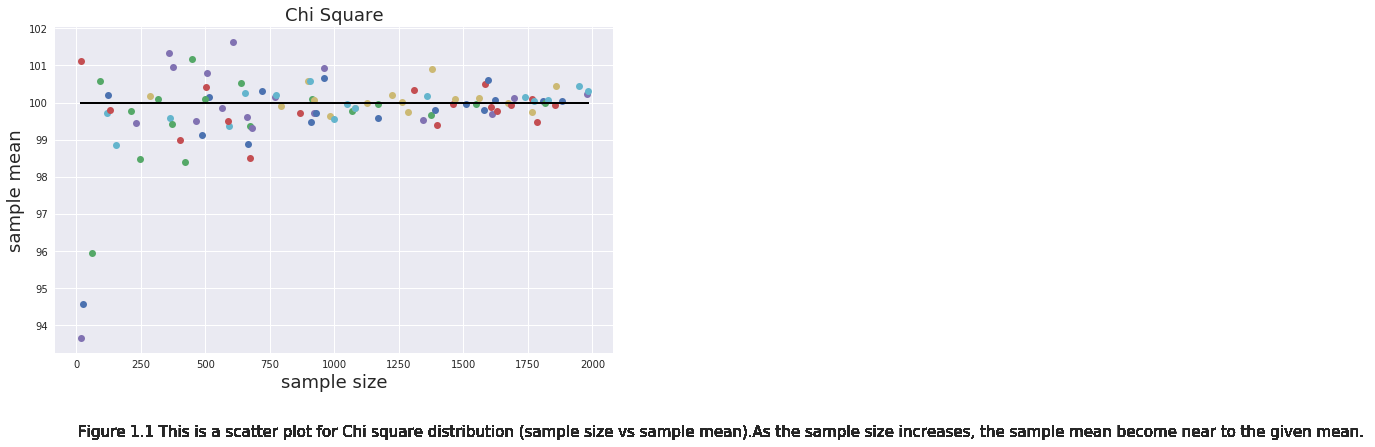

In [7]:
#1. chi square
dic['chisq'] = {}
np.random.seed(222)

for n in mysize:
    dic['chisq'][n] = np.random.chisquare(pop_mean, size = n)

    
dic['chisq']['means'] = {}
chisq_plt = pl.figure(figsize = (10,6)). add_subplot(111)

for i in dic['chisq']:
    if not type(i) == str:
        dic['chisq']['means'][i] = dic['chisq'][i].mean()
        chisq_plt.plot(i, dic['chisq']['means'][i],  'o')
        chisq_plt.set_xlabel('sample size', fontsize = 18)
        chisq_plt.set_ylabel('sample mean', fontsize = 18)
        chisq_plt.set_title('Chi Square', fontsize = 18)
        text1 = 'Figure 1.1 This is a scatter plot for Chi square distribution (sample size vs sample mean).'+ \
        'As the sample size increases, the sample mean become near to the given mean. '
        chisq_plt.text(5, 91, text1,fontsize = 15)
        chisq_plt.plot([min(mysize), max(mysize)], [pop_mean, pop_mean], 'k')


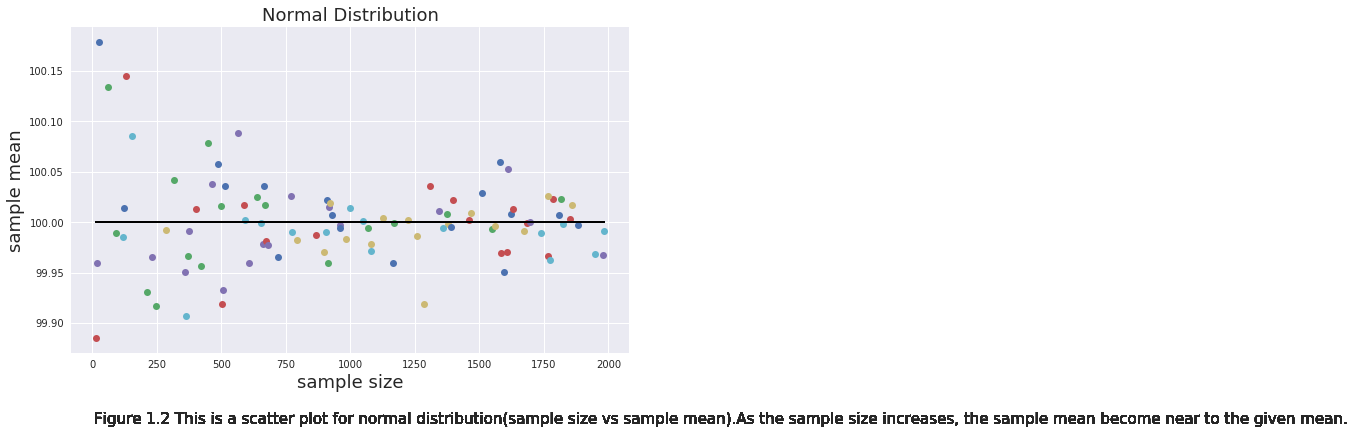

In [8]:
#2. normal distribution
#gaus/normal
#numpy.random.normal(loc=0.0, scale=1.0, size=None)
dic['normal'] = {}
np.random.seed(222)

for n in mysize:
    dic['normal'][n] = np.random.normal(pop_mean, 1.0 , size = n)

    
dic['normal']['means'] = {}
norm_plt = pl.figure(figsize = (10,6)). add_subplot(111)

for i in dic['normal']:
    if not type(i) == str:
        dic['normal']['means'][i] = dic['normal'][i].mean()
        norm_plt.plot(i, dic['normal']['means'][i],  'o')
        norm_plt.set_xlabel('sample size', fontsize = 18)
        norm_plt.set_ylabel('sample mean', fontsize = 18)
        norm_plt.set_title('Normal Distribution', fontsize = 18)
        text2 = 'Figure 1.2 This is a scatter plot for normal distribution(sample size vs sample mean).'+ \
        'As the sample size increases, the sample mean become near to the given mean. '
        norm_plt.text(5, 99.8, text2,fontsize = 15)
        norm_plt.plot([min(mysize), max(mysize)], [pop_mean, pop_mean], 'k')
        

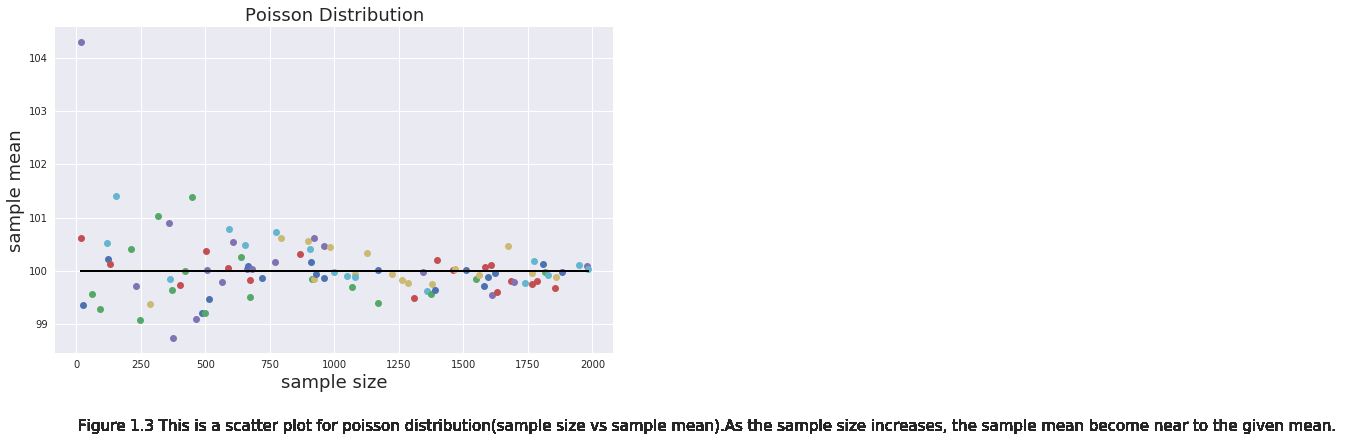

In [9]:
#3. Poisson distribution
# numpy.random.poisson(lam=1.0, size=None)
#lam: >=0

dic['pois'] = {}
np.random.seed(222)

for n in mysize:
    dic['pois'][n] = np.random.poisson(lam=100, size=n)

    
dic['pois']['means'] = {}
pois_plt = pl.figure(figsize = (10,6)). add_subplot(111)

for i in dic['pois']:
    if not type(i) == str:
        dic['pois']['means'] [i] = dic['pois'][i].mean()
        pois_plt.plot(i, dic['pois']['means'][i],  'o')
        pois_plt.set_xlabel('sample size', fontsize = 18)
        pois_plt.set_ylabel('sample mean', fontsize = 18)
        pois_plt.set_title('Poisson Distribution', fontsize = 18)
        text3 = 'Figure 1.3 This is a scatter plot for poisson distribution(sample size vs sample mean).'+ \
        'As the sample size increases, the sample mean become near to the given mean. '
        pois_plt.text(5, 97, text3,fontsize = 15)
        pois_plt.plot([min(mysize), max(mysize)], [pop_mean, pop_mean], 'k')
        

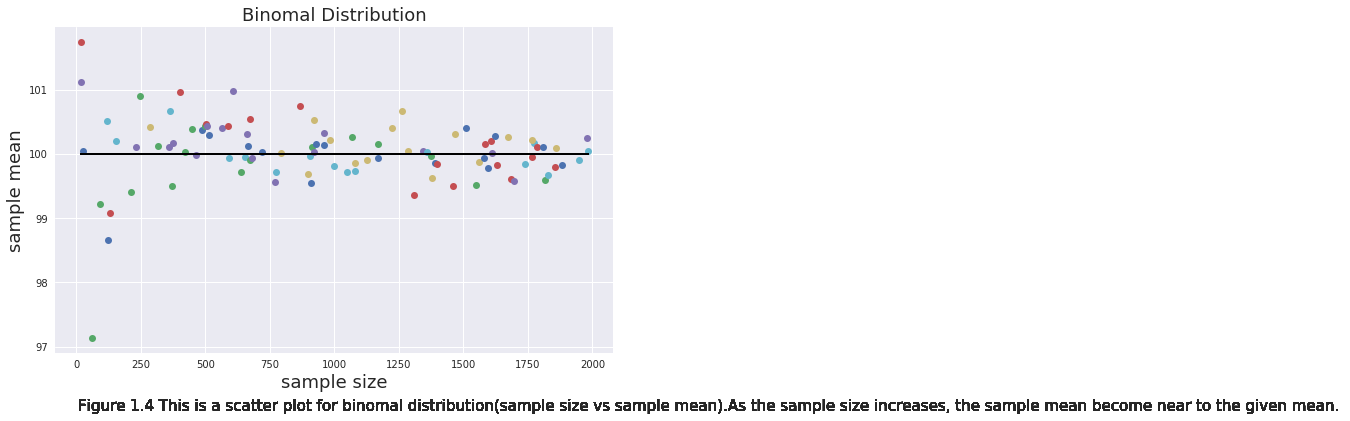

In [10]:
#4. Binomal distribution
# binomial sampling => numpy.random.binomial(n, p, size=None)
# n: parameter of the distribution; >=0;  p: parameter of the distribution, 0-1; size: optional

# n*p = 100 = pop_mean


dic['bino'] = {}
p = 0.1
np.random.seed(222)

for n in mysize:
    dic['bino'][n] = np.random.binomial(1000, p, size=n)

    
dic['bino']['means'] = {}
bino_plt = pl.figure(figsize = (10,6)). add_subplot(111)

for i in dic['bino']:
    if not type(i) == str:
        dic['bino']['means'][i] = dic['bino'][i].mean()
        bino_plt.plot(i, dic['bino']['means'][i],  'o')
        bino_plt.set_xlabel('sample size', fontsize = 18)
        bino_plt.set_ylabel('sample mean', fontsize = 18)
        bino_plt.set_title('Binomal Distribution', fontsize = 18)
        text4 = 'Figure 1.4 This is a scatter plot for binomal distribution(sample size vs sample mean).'+ \
        'As the sample size increases, the sample mean become near to the given mean. '
        bino_plt.text(5, 96,text4,fontsize = 15)
        bino_plt.plot([min(mysize), max(mysize)], [pop_mean, pop_mean], 'k')
        
        

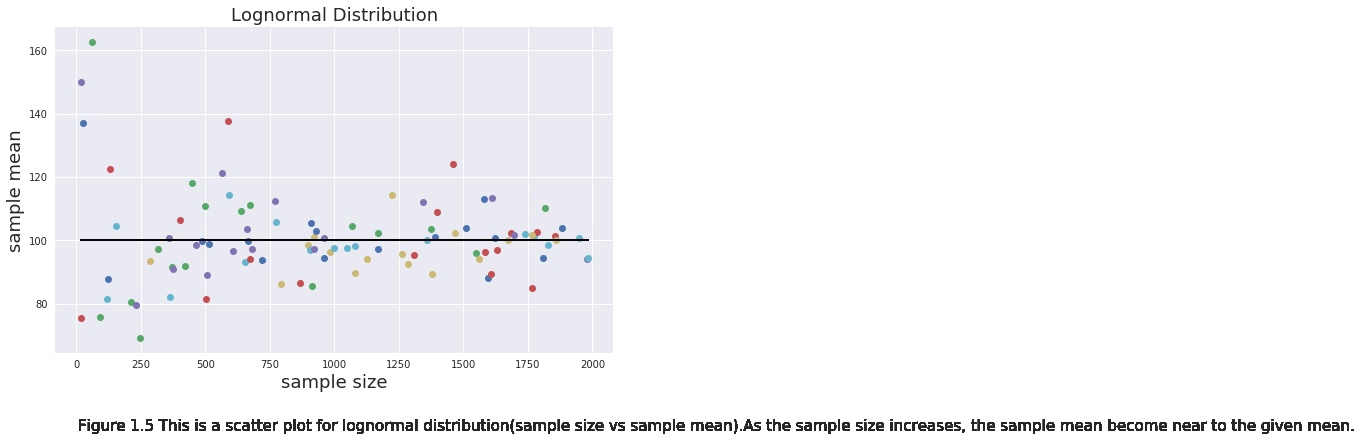

In [11]:
#5. lognormal
#numpy.random.lognormal(mean=0.0, sigma=1.0, size=None)
#mean = exp(miu + sigma**2 / 2)

dic['lnor'] = {}
np.random.seed(222)
sigma = 2 ** 0.5



for n in mysize:
    dic['lnor'][n] = numpy.random.lognormal(log(100)-1, sigma, size=n)

    
dic['lnor']['means'] = {}
lnor_plt = pl.figure(figsize = (10,6)). add_subplot(111)

for i in dic['lnor']:
    if not type(i) == str:
        dic['lnor']['means'][i] = dic['lnor'][i].mean()
        lnor_plt.plot(i, dic['lnor']['means'][i],  'o')
        lnor_plt.set_xlabel('sample size', fontsize = 18)
        lnor_plt.set_ylabel('sample mean', fontsize = 18)
        lnor_plt.set_title('Lognormal Distribution', fontsize = 18)
        text5 = 'Figure 1.5 This is a scatter plot for lognormal distribution(sample size vs sample mean).'+ \
        'As the sample size increases, the sample mean become near to the given mean. '
        lnor_plt.text(5, 40, text5, fontsize = 15)
        lnor_plt.plot([min(mysize), max(mysize)], [pop_mean, pop_mean], 'k')
        

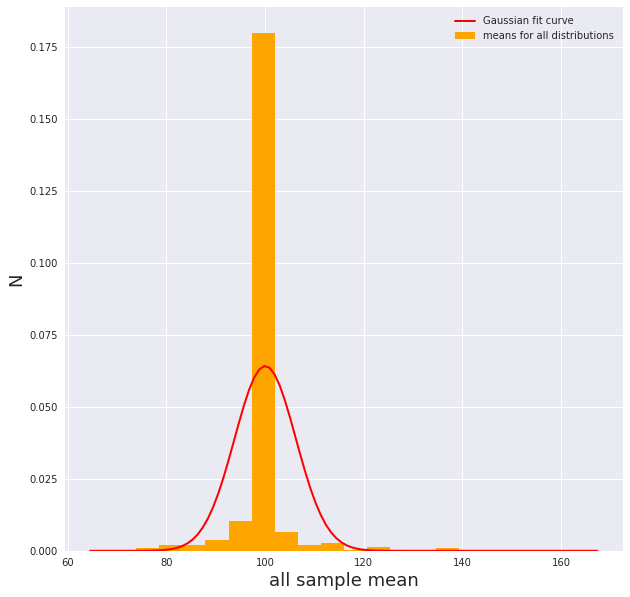

In [12]:
from scipy.stats import norm

hist_chisq = list(dic['chisq']['means'].values())
hist_norm = list(dic['normal']['means'].values())
hist_bino = list(dic['bino']['means'].values())
hist_lnor = list(dic['lnor']['means'].values())
hist_pois = list(dic['pois']['means'].values())

hist_all = [hist_chisq + hist_norm + hist_bino + hist_lnor + hist_pois]
mean_all, std_all = norm.fit(hist_all)

#plot the histogram
pl.figure(figsize=(10, 10))
pl.hist(hist_all, color = 'orange', bins =20, normed = 1 )

#print (mean_all, std_all)

#plot the gaussian fit
x_min, x_max = pl.xlim()
x = np.linspace(x_min, x_max, 100)
p = norm.pdf(x, mean_all, std_all)
pl.plot(x, p, 'k', linewidth = 2, color = 'red')

legend = [ 'Gaussian fit curve', 'means for all distributions']
pl.legend(legend)
pl.xlabel('all sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 2. This is a histogram with a gaussian fit curve. The sample data are from the previous 5 different distributions. We can see that: as the sample size increase, the distribution of the whole sample size tends to become a normal distribution. As the central limit theorem describes, the sample mean will approach to the preset mean as the sample size increase.  